# Training Insititute Student Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r'C:\Users\MY PC\Desktop\Train.csv')
test = pd.read_csv(r'C:\Users\MY PC\Desktop\Test.csv')
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,13695_33,T_2,T,117,33,offline,intermediate,13695,F,Matriculation,2,43.0,2,N,1.0,1
1,873_139,Y_2,Y,120,139,offline,hard,873,M,Matriculation,2,NaN,2,N,3.0,1
2,6987_73,V_4,V,122,73,online,easy,6987,M,Matriculation,1,NaN,2,N,3.0,1
3,3380_100,V_1,V,133,100,offline,vary hard,3380,F,High School Diploma,3,30.0,2,Y,1.0,0
4,1906_114,Y_4,Y,121,114,offline,intermediate,1906,M,High School Diploma,3,NaN,2,N,5.0,1


In [4]:
train.shape

(51202, 16)

In [5]:
test.shape

(21945, 15)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51202 entries, 0 to 51201
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         51202 non-null  object 
 1   program_id                 51202 non-null  object 
 2   program_type               51202 non-null  object 
 3   program_duration           51202 non-null  int64  
 4   test_id                    51202 non-null  int64  
 5   test_type                  51202 non-null  object 
 6   difficulty_level           51202 non-null  object 
 7   trainee_id                 51202 non-null  int64  
 8   gender                     51202 non-null  object 
 9   education                  51202 non-null  object 
 10  city_tier                  51202 non-null  int64  
 11  age                        31857 non-null  float64
 12  total_programs_enrolled    51202 non-null  int64  
 13  is_handicapped             51202 non-null  obj

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21945 entries, 0 to 21944
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21945 non-null  object 
 1   program_id                 21945 non-null  object 
 2   program_type               21945 non-null  object 
 3   program_duration           21945 non-null  int64  
 4   test_id                    21945 non-null  int64  
 5   test_type                  21945 non-null  object 
 6   difficulty_level           21945 non-null  object 
 7   trainee_id                 21945 non-null  int64  
 8   gender                     21945 non-null  object 
 9   education                  21945 non-null  object 
 10  city_tier                  21945 non-null  int64  
 11  age                        13561 non-null  float64
 12  total_programs_enrolled    21945 non-null  int64  
 13  is_handicapped             21945 non-null  obj

## Dropping the Variables:
- id
- program_id
- test_id
- trainee_id

These variables would not have much impact on the model.

In [8]:
train = train.drop(["id" , "program_id" , "test_id" , "trainee_id"] , axis = 1)
train.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,T,117,offline,intermediate,F,Matriculation,2,43.0,2,N,1.0,1
1,Y,120,offline,hard,M,Matriculation,2,NaN,2,N,3.0,1
2,V,122,online,easy,M,Matriculation,1,NaN,2,N,3.0,1
3,V,133,offline,vary hard,F,High School Diploma,3,30.0,2,Y,1.0,0
4,Y,121,offline,intermediate,M,High School Diploma,3,NaN,2,N,5.0,1


In [9]:
test = test.drop(["id" , "program_id" , "test_id" , "trainee_id"] , axis = 1)
test.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,Y,136,offline,intermediate,M,Matriculation,1,42.0,2,Y,3.0
1,T,134,offline,intermediate,F,Matriculation,3,25.0,2,Y,1.0
2,V,131,offline,intermediate,F,High School Diploma,3,24.0,3,N,1.0
3,V,131,offline,intermediate,M,Matriculation,3,NaN,4,N,3.0
4,Y,136,online,easy,M,High School Diploma,1,45.0,3,N,4.0


## Missing Value Treatment

In [10]:
train.isnull().sum()

program_type                     0
program_duration                 0
test_type                        0
difficulty_level                 0
gender                           0
education                        0
city_tier                        0
age                          19345
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       51
is_pass                          0
dtype: int64

In [11]:
test.isnull().sum()

program_type                    0
program_duration                0
test_type                       0
difficulty_level                0
gender                          0
education                       0
city_tier                       0
age                          8384
total_programs_enrolled         0
is_handicapped                  0
trainee_engagement_rating      26
dtype: int64

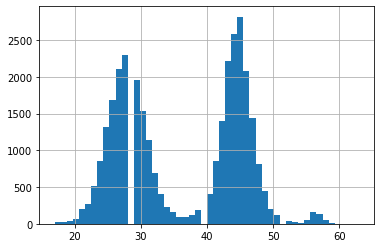

In [12]:
train.age.hist(bins=50)
plt.show()

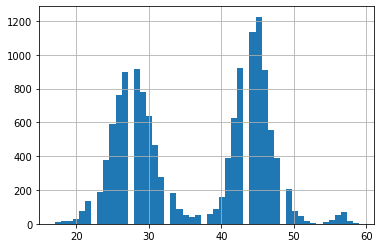

In [13]:
test.age.hist(bins=50)
plt.show()

### Direct imputation for age column would not give true insights hence creating groups to impute for age of each category

In [14]:
train.groupby(["program_type" ,"gender" , "education"])['age'].mean()

program_type  gender  education          
S             F       Bachelors              41.087719
                      High School Diploma    37.694581
                      Matriculation          40.726027
              M       Bachelors              42.035461
                      High School Diploma    37.509615
                                               ...    
Z             F       No Qualification       29.780488
              M       Bachelors              41.421053
                      High School Diploma    35.934132
                      Matriculation          37.332344
                      No Qualification       27.000000
Name: age, Length: 65, dtype: float64

In [15]:
train["age"] = train["age"].fillna(train.groupby(["program_type" ,"gender" , "education"])['age'].transform('mean'))

In [16]:
test["age"] = test["age"].fillna(test.groupby(["program_type" , "gender" , "education"])['age'].transform('mean'))

In [17]:
print(train["age"].isnull().sum())
print(test["age"].isnull().sum())

0
0


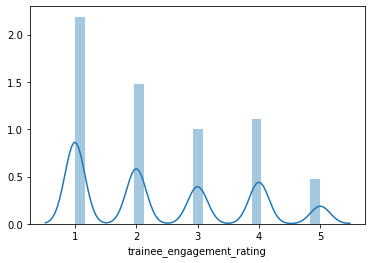

In [18]:
sns.distplot(train.trainee_engagement_rating)
plt.show()

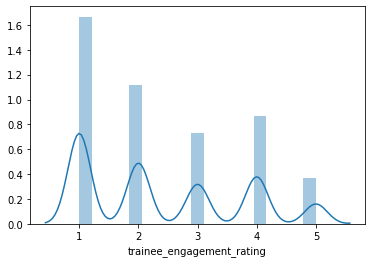

In [19]:
sns.distplot(test.trainee_engagement_rating)
plt.show()

In [20]:
### Filling missing values with mean for trainee_engagement_rating

train["trainee_engagement_rating"] = train["trainee_engagement_rating"].fillna(train["trainee_engagement_rating"].mean())
train["trainee_engagement_rating"].isnull().sum()

0

In [21]:
### Filling missing values with mean for trainee_engagement_rating

test["trainee_engagement_rating"] = test["trainee_engagement_rating"].fillna(test["trainee_engagement_rating"].mean())
test["trainee_engagement_rating"].isnull().sum()

0

In [22]:
x = train.drop(["is_pass"],axis=1)
y = train["is_pass"]

# EDA

In [23]:
num_columns = list(train._get_numeric_data().columns)
all_columns = list(train.columns)

In [24]:
num_columns

['program_duration',
 'city_tier',
 'age',
 'total_programs_enrolled',
 'trainee_engagement_rating',
 'is_pass']

In [25]:
cat_columns = []
for i in all_columns:
    if i not in num_columns:
        cat_columns.append(i)
cat_columns

['program_type',
 'test_type',
 'difficulty_level',
 'gender',
 'education',
 'is_handicapped']

### CATAGORICAL FEATURES

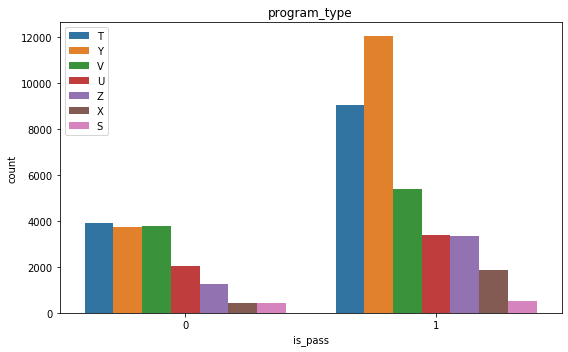

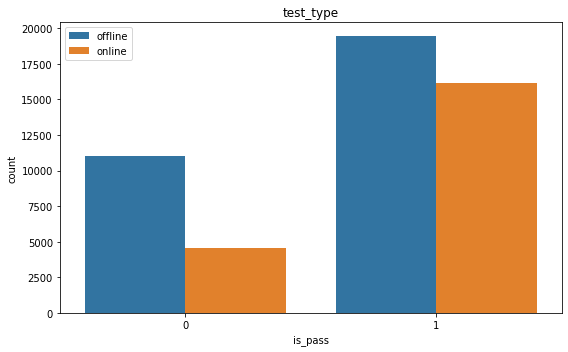

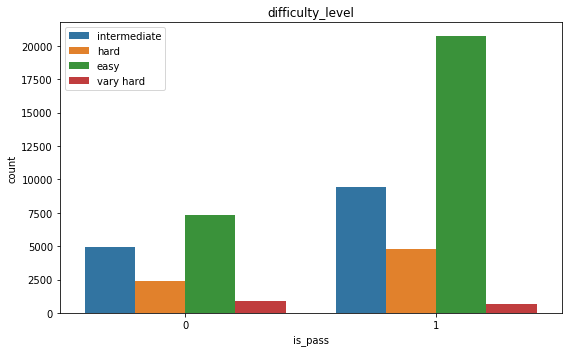

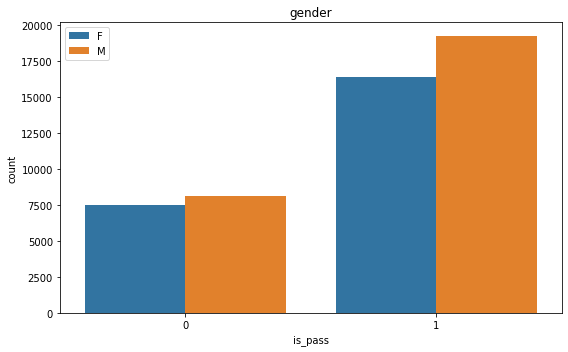

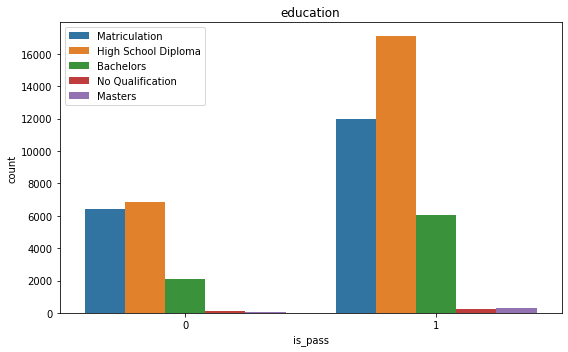

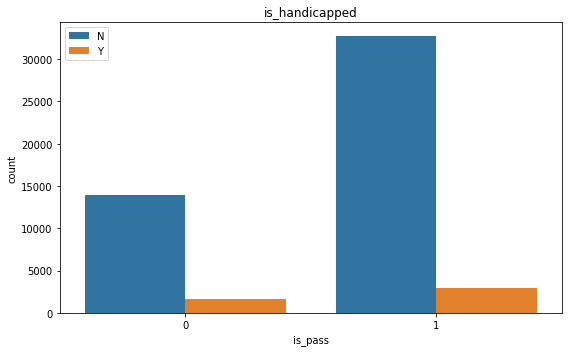

In [26]:
for i in cat_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(train["is_pass"],hue=train[i])
    plt.legend(loc=2)
    plt.title(i)
    plt.tight_layout()
    plt.show()

### Analyzed Results

1. Y-program type generates most pass outcomes and T-program type generates most failed outcomes.
2. In case of offline test type,pass ratio is more when compared to online test type.
3. Pass ratio is more when difficulty level is 'easy'.
4. More male trainees have passed in comparison with females.
5. High-school diploma trainees have passed in more number.
6. Non-handicapped trainees have passed in more number.

### NUMERICAL FEATURES

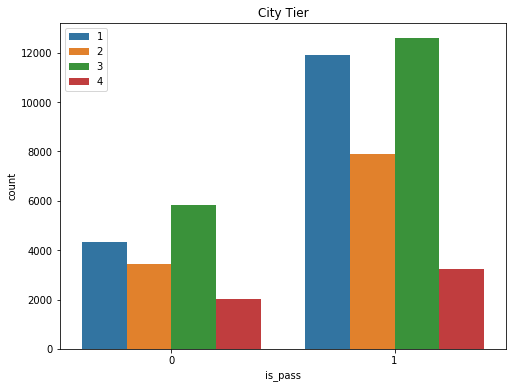

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(train['is_pass'],hue=train['city_tier'])
plt.legend(loc=2)
plt.title("City Tier")
plt.show()

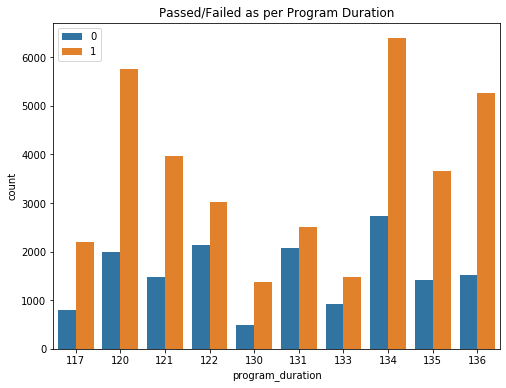

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(train['program_duration'],hue=train['is_pass'])
plt.legend(loc=2)
plt.title("Passed/Failed as per Program Duration")
plt.show()

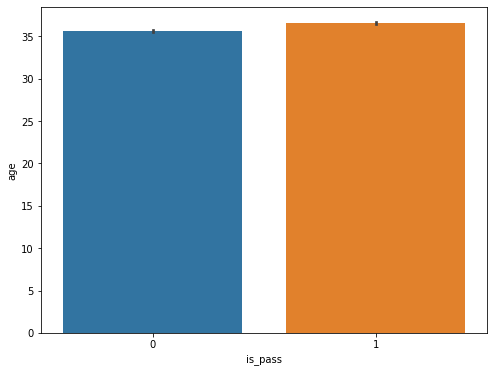

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(train["is_pass"],train["age"])
plt.show()

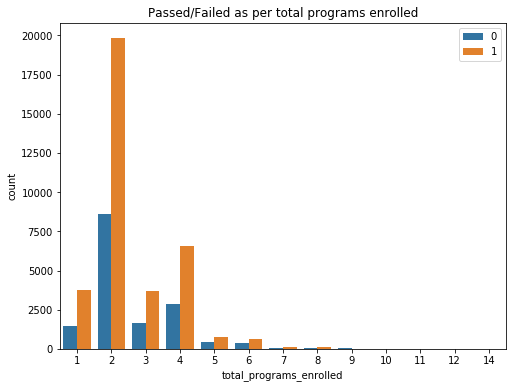

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(train['total_programs_enrolled'],hue=train['is_pass'])
plt.legend(loc=1)
plt.title("Passed/Failed as per total programs enrolled")
plt.show()

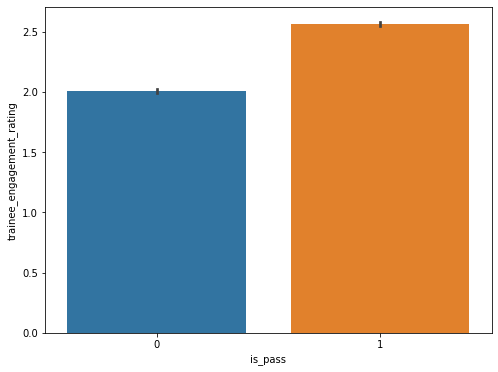

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(train["is_pass"],train["trainee_engagement_rating"])
plt.show()

### Analyzed Results

1. For a 134 days Program duration followed by a 120 days program duration pass ration is high.
2. More trainees from tier-3 city have passed.
3. Trainees with 35+ age have passed in more number.
4. Trainees who have enrolled in 2 programs have passed in more number followed by trainees with 4-programs enrollment.
5. An average trainee engagement rating of more than 2 have resulted in more number of passed trainees. 

# DATA PRE-PROCESSING

In [32]:
train_cat = train[cat_columns]
train_num = train[num_columns]

In [33]:
train_cat.shape

(51202, 6)

In [34]:
train_cat_dummy = pd.get_dummies(train_cat,prefix_sep="_",drop_first=True)
train_cat_dummy.head()

,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z,test_type_online,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,gender_M,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,is_handicapped_Y
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0


In [35]:
Train = train_num.join(train_cat_dummy)
Train.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,program_type_T,program_type_U,program_type_V,program_type_X,...,test_type_online,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,gender_M,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,is_handicapped_Y
0,117,2,43.000000,2,1.0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,120,2,35.718915,2,3.0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,122,1,35.252582,2,3.0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,133,3,30.000000,2,1.0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,121,3,34.835922,2,5.0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


### Pre-processing the Test dataset

In [36]:
test_num = list(test._get_numeric_data().columns)
test_all = list(test.columns)
test_cat = []
for i in test_all:
    if i not in test_num:
        test_cat.append(i)
test_cat

['program_type',
 'test_type',
 'difficulty_level',
 'gender',
 'education',
 'is_handicapped']

In [37]:
testnum = test[test_num]
testcat = test[test_cat]
testcat_dummy = pd.get_dummies(testcat,prefix_sep='_',drop_first=True)
testcat_dummy.head()

,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z,test_type_online,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,gender_M,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,is_handicapped_Y
0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0


In [38]:
Test = testnum.join(testcat_dummy)
Test.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,...,test_type_online,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,gender_M,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,is_handicapped_Y
0,136,1,42.000000,2,3.0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
1,134,3,25.000000,2,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,131,3,24.000000,3,1.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,131,3,35.093137,4,3.0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,136,1,45.000000,3,4.0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0


# MULTICOLLINEARITY CHECK

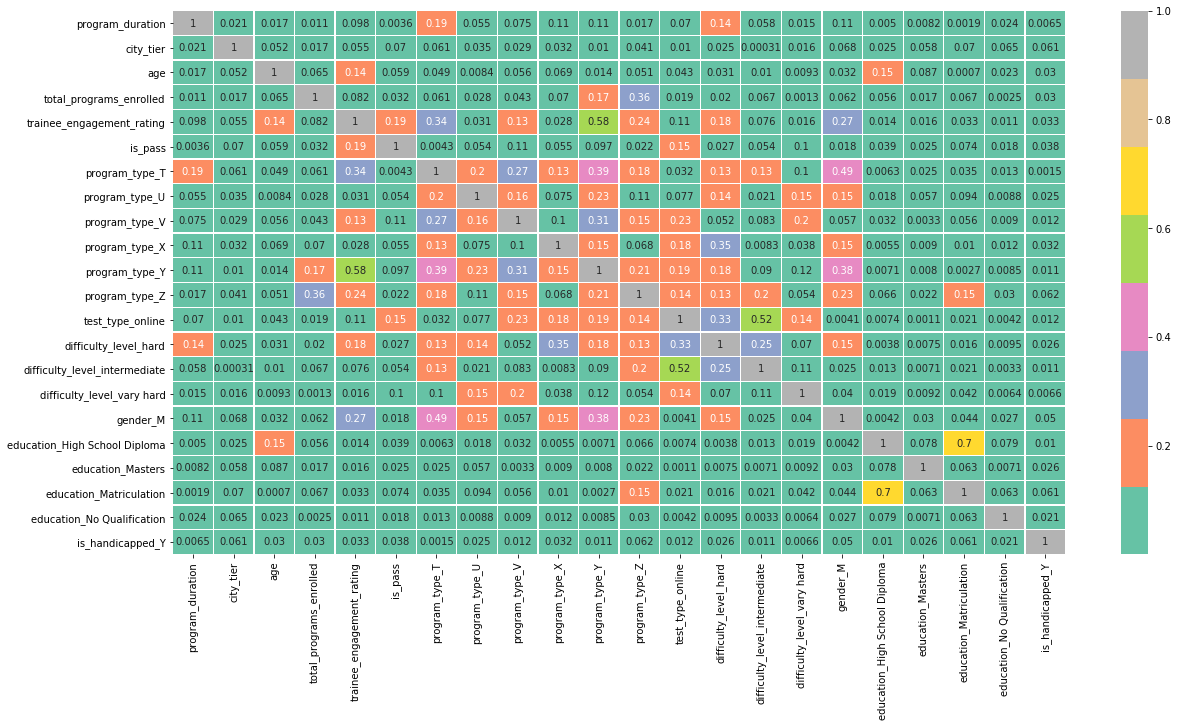

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(Train.corr()),annot=True,linewidths=0.3,cmap="Set2")
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_data = Train.drop(["is_pass"],axis=1)
Y_data = Train["is_pass"]

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_stand = sc.fit_transform(X_data)

In [42]:
vif = pd.DataFrame()
vif["Index"] = X_data.keys()
vif["Score"] = [variance_inflation_factor(x_stand,i) for i in range(len(X_data.keys()))]
vif.set_index(["Index"] , inplace = True)
vif

,Score
Index,
program_duration,1.093126
city_tier,1.027558
age,1.125639
total_programs_enrolled,1.185980
trainee_engagement_rating,1.753509
program_type_T,11.673996
program_type_U,6.235516
program_type_V,8.974875
program_type_X,3.465361


#### We can see program type T and Y have high VIF, Hence dropping program type Y 

In [43]:
X_data = Train.drop(["is_pass" , "program_type_Y"],axis=1)

In [44]:
x_stand = sc.fit_transform(X_data)

vif = pd.DataFrame()
vif["Index"] = X_data.keys()
vif["Score"] = [variance_inflation_factor(x_stand,i) for i in range(len(X_data.keys()))]
vif.set_index(["Index"] , inplace = True)
vif

,Score
Index,
program_duration,1.083866
city_tier,1.026331
age,1.116007
total_programs_enrolled,1.184949
trainee_engagement_rating,1.711513
program_type_T,2.798646
program_type_U,1.447040
program_type_V,1.855273
program_type_X,1.260414


#### Multicollinearity has been resolved

# MODEL BUILDING

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score , RandomizedSearchCV , RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score , roc_curve , classification_report , accuracy_score

### Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(X_data,Y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
Y_predict = lr.predict(X_data)

In [48]:
fpr , tpr , thresolds = roc_curve(Y_data,lr.predict_proba(X_data)[:,1])

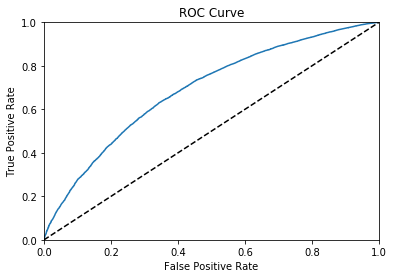

In [49]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

In [50]:
print("The ROC_AUC score of training data is {:.2f}".format(roc_auc_score(Y_data,Y_predict)*100),"%")

The ROC_AUC score of training data is 56.49 %


In [51]:
print("The average cross-validation score is {:.2f}".format(cross_val_score(lr,X_data,Y_data,cv=10).mean()*100),"%")

The average cross-validation score is 70.89 %


In [52]:
print("The accuracy score of training data is {:.2f}".format(accuracy_score(Y_data,Y_predict)*100),"%")

The accuracy score of training data is 70.92 %


In [53]:
print('The classification report is as follows:\n',classification_report(Y_data,Y_predict))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.57      0.20      0.29     15596
           1       0.73      0.93      0.82     35606

    accuracy                           0.71     51202
   macro avg       0.65      0.56      0.55     51202
weighted avg       0.68      0.71      0.66     51202



In [54]:
print( np.unique( Y_predict ) )

[0 1]


#### As we can clearly see that the dataset is imbalanced, hence resampling is done with replacement

# RESAMPLING

In [55]:
from sklearn.utils import resample
data_majority = Train[Train["is_pass"] == 1]
data_minority = Train[Train["is_pass"] == 0]

In [56]:
data_minority_resampled = resample(data_minority , n_samples = 35606 , replace = True , random_state = 42)

In [57]:
df = pd.concat([data_majority , data_minority_resampled])

In [58]:
X = df.drop(["is_pass" , "program_type_Y"],axis=1)
Y = df["is_pass"]

In [59]:
Y.value_counts()

1    35606
0    35606
Name: is_pass, dtype: int64

### Logistic Regression on upsampled dataset

In [60]:
lr.fit(X,Y)
Y_predict_sampled = lr.predict(X)

In [61]:
print("The accuracy score of training data is {:.2f}".format(accuracy_score(Y,Y_predict_sampled)*100),"%")

The accuracy score of training data is 64.07 %


In [62]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [63]:
scores = cross_val_score(lr, X , Y, cv=cv, n_jobs=-1)

In [64]:
print("The average cross-validation score is {:.2f}".format(scores.mean()*100),"%")

The average cross-validation score is 64.00 %


In [65]:
print('The classification report is as follows:\n',classification_report(Y,Y_predict_sampled))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     35606
           1       0.64      0.64      0.64     35606

    accuracy                           0.64     71212
   macro avg       0.64      0.64      0.64     71212
weighted avg       0.64      0.64      0.64     71212



In [66]:
print( np.unique( Y_predict_sampled ) )

[0 1]


## Random Forest Classifier(On balanced dataset)

In [69]:
rf = RandomForestClassifier(random_state=30)

In [70]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [71]:
grid_rf={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf}

In [72]:
rf_random = RandomizedSearchCV(rf , grid_rf , n_iter = 12 , cv=5, verbose=2 , n_jobs=1)

In [107]:
rf_random.fit(X,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   6.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   6.0s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   6.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   6.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=  28.2s
[CV] n_estimators=900, min_samples_spl

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.2s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 37.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [108]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [92]:
## USING THE ABOVE COMPUTED HYPER-PARAMETRES

rf_random1 = RandomForestClassifier(n_estimators = 600 , min_samples_split = 2 , min_samples_leaf = 1 , max_features = 'sqrt' , 
                                    max_depth = 20,random_state=30)

In [93]:
rf_random1.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [94]:
YYYY = rf_random1.predict(X)

In [95]:
print("The Accuracy score of training data is {:.2f}".format(accuracy_score(YYYY,Y)*100),"%")

The Accuracy score of training data is 87.89 %


In [97]:
scores_rfc = cross_val_score(rf_random1,X,Y,scoring='accuracy', cv=cv, n_jobs=-1)

In [98]:
print("The average cross-validation score is {:.2f}".format(scores_rfc.mean()*100),"%")

The average cross-validation score is 79.20 %


In [99]:
print('The classification report is as follows:\n',classification_report(YYYY,Y))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     37379
           1       0.85      0.90      0.88     33833

    accuracy                           0.88     71212
   macro avg       0.88      0.88      0.88     71212
weighted avg       0.88      0.88      0.88     71212



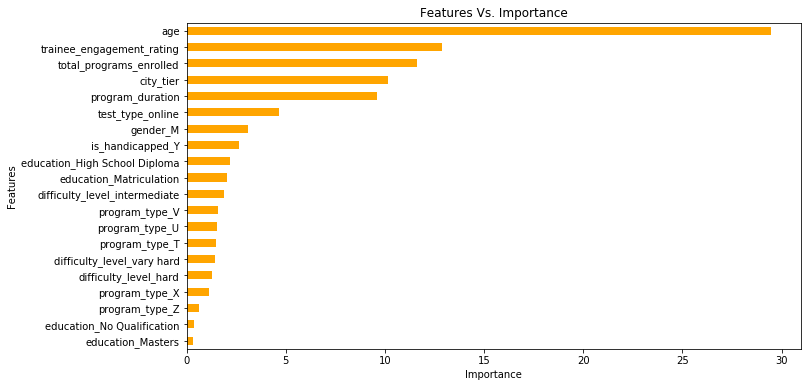

In [100]:
data_frame = pd.DataFrame()
data_frame['importance'] = rf_random1.feature_importances_ * 100
data_frame['features'] = X.columns
data_frame.set_index('features' , inplace = True)
data_frame.sort_values(by = ["importance"] , ascending = True , inplace = True)
data_frame.importance.plot(kind = 'barh' , figsize = (11,6) , color = 'orange')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features Vs. Importance')
plt.show()

### Self-Analysed Variables for Random Forest Classifier

In [69]:
X.columns

Index(['program_duration', 'city_tier', 'age', 'total_programs_enrolled',
       'trainee_engagement_rating', 'program_type_T', 'program_type_U',
       'program_type_V', 'program_type_X', 'program_type_Z',
       'test_type_online', 'difficulty_level_hard',
       'difficulty_level_intermediate', 'difficulty_level_vary hard',
       'gender_M', 'education_High School Diploma', 'education_Masters',
       'education_Matriculation', 'education_No Qualification',
       'is_handicapped_Y'],
      dtype='object')

In [73]:
X_new = X.drop(["difficulty_level_intermediate" , "program_type_U" , "program_type_T" , "program_type_V" , 
                    "difficulty_level_hard" , "difficulty_level_vary hard" , "program_type_X" , "program_type_Z",
                    "education_No Qualification" , "education_Masters"] , axis = 1)

In [67]:
rf_random11 = RandomForestClassifier(n_estimators = 600 , min_samples_split = 2 , min_samples_leaf = 1 , max_features = 10, 
                                     max_depth = 20,random_state=30)

In [74]:
rf_random11.fit(X_new,Y)
Y_predict11 = rf_random11.predict(X_new)

In [75]:
print("The Accuracy score of training data is {:.2f}".format(accuracy_score(Y_predict11,Y)*100),"%")

The Accuracy score of training data is 84.76 %


In [78]:
scores_self_analysed = cross_val_score(rf_random11,X_new,Y,scoring='accuracy', cv=cv, n_jobs=-1)

In [79]:
print("The average cross-validation score is {:.2f}".format(scores_self_analysed.mean()*100),"%")

The average cross-validation score is 76.98 %


In [127]:
print('The classification report is as follows:\n',classification_report(Y_predict11,Y))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.90      0.82      0.85     39009
           1       0.80      0.88      0.84     32203

    accuracy                           0.85     71212
   macro avg       0.85      0.85      0.85     71212
weighted avg       0.85      0.85      0.85     71212



## Kneighbors Classifier(On balanced dataset)

In [80]:
grid1 = {'n_neighbors': np.array([5,10,15,20]) , 'p' : np.array([3,6,9,12])}
knn = KNeighborsClassifier(metric='minkowski')
knn1 = RandomizedSearchCV(knn, grid1, n_iter = 10 , cv = 5 , verbose = 2 , n_jobs = 1)

In [81]:
ms = MinMaxScaler()
Xms = ms.fit_transform(X)

In [82]:
Xmsdf = pd.DataFrame(Xms)
Xmsdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.333333,0.565217,0.076923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.157895,0.333333,0.406933,0.076923,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.263158,0.000000,0.396795,0.076923,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.210526,0.666667,0.387737,0.076923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.894737,0.333333,0.412181,0.076923,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
knn1.fit(Xmsdf,Y)
y_predict_knn = knn1.predict(Xmsdf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] p=6, n_neighbors=15 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. p=6, n_neighbors=15, total= 1.1min
[CV] p=6, n_neighbors=15 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] .............................. p=6, n_neighbors=15, total= 1.1min
[CV] p=6, n_neighbors=15 .............................................
[CV] .............................. p=6, n_neighbors=15, total= 1.0min
[CV] p=6, n_neighbors=15 .............................................
[CV] .............................. p=6, n_neighbors=15, total= 1.1min
[CV] p=6, n_neighbors=15 .............................................
[CV] .............................. p=6, n_neighbors=15, total= 1.0min
[CV] p=9, n_neighbors=20 .............................................
[CV] .............................. p=9, n_neighbors=20, total= 1.2min
[CV] p=9, n_neighbors=20 .............................................
[CV] .............................. p=9, n_neighbors=20, total= 1.2min
[CV] p=9, n_neighbors=20 .............................................
[CV] .............................. p=9, n_neighbors=20, total= 1.1min
[CV] p=9, n_neighbors=20 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 51.2min finished


In [84]:
print("Tuned hyperparameter : {}".format(knn1.best_params_))

Tuned hyperparameter : {'p': 3, 'n_neighbors': 5}


In [85]:
## USING THE ABOVE COMPUTED HYPER-PARAMETRES

knn0 = KNeighborsClassifier(n_neighbors = 5 , p = 3 , metric='minkowski')
knn0.fit(Xmsdf,Y)
y_predict_knn_new = knn0.predict(Xmsdf)

In [86]:
print("The accuracy score of the model is {:.2f}".format(accuracy_score(Y , y_predict_knn_new) * 100) , "%")

The accuracy score of the model is 79.76 %


In [88]:
scores_knn = cross_val_score(knn0,Xmsdf,Y,scoring='accuracy', cv=cv, n_jobs=-1)

In [89]:
print("The average cross-validation score is {:.2f}".format(scores_knn.mean()*100),"%")

The average cross-validation score is 70.99 %


In [90]:
print('The classification report is as follows:\n',classification_report(Y , y_predict_knn_new))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80     35606
           1       0.81      0.78      0.79     35606

    accuracy                           0.80     71212
   macro avg       0.80      0.80      0.80     71212
weighted avg       0.80      0.80      0.80     71212



# CONCLUSION

In [101]:
print("The Accuracy score with Logistic regression is {:.2f}".format(accuracy_score(Y,Y_predict_sampled)*100),"%")
print()
print("The average cross-validation score with Logistic regression is {:.2f}".format(scores.mean()*100),"%")
print()
print("The Accuracy score with Random Forest Classifier is {:.2f}".format(accuracy_score(YYYY,Y)*100),"%")
print()
print("The average cross-validation score with Random Forest Classifier is {:.2f}".format(scores_rfc.mean()*100),"%")
print()
print("The Accuracy score with Random Forest Classifier on self analysed variables is {:.2f}".format(accuracy_score(Y_predict11,Y)*100),"%")
print()
print("The average cross-validation score with Random Forest Classifier on self analysed variables is {:.2f}".format(scores_self_analysed.mean()*100),"%")
print()
print("The Accuracy score with KNeighbors Classifier is {:.2f}".format(accuracy_score(Y , y_predict_knn_new) * 100) , "%")
print()
print("The average cross-validation score with KNeighbors Classifier is {:.2f}".format(scores_knn.mean()*100),"%")

The Accuracy score with Logistic regression is 64.07 %

The average cross-validation score with Logistic regression is 64.00 %

The Accuracy score with Random Forest Classifier is 87.89 %

The average cross-validation score with Random Forest Classifier is 79.20 %

The Accuracy score with Random Forest Classifier on self analysed variables is 84.76 %

The average cross-validation score with Random Forest Classifier on self analysed variables is 76.98 %

The Accuracy score with KNeighbors Classifier is 79.76 %

The average cross-validation score with KNeighbors Classifier is 70.99 %


#### We can observe from the entire analysis that Random forest classifier has performed well and with best selected features also
#### Random forest classifier has provided a cosiderably good accuracy as well as cross validation score.
#### So,"Random Forest Classifier" has finally been selected for test data prediction.

# Test Data Prediction

In [102]:
Test1 = Test.drop(["program_type_Y","difficulty_level_intermediate" , "program_type_U" , "program_type_T" , "program_type_V" , 
                    "difficulty_level_hard" , "difficulty_level_vary hard" , "program_type_X" , "program_type_Z",
                    "education_No Qualification" , "education_Masters"],axis=1)
y_test_predict = rf_random11.predict(Test1)
test['is_pass'] = y_test_predict
test.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y,136,offline,intermediate,M,Matriculation,1,42.000000,2,Y,3.0,1
1,T,134,offline,intermediate,F,Matriculation,3,25.000000,2,Y,1.0,0
2,V,131,offline,intermediate,F,High School Diploma,3,24.000000,3,N,1.0,0
3,V,131,offline,intermediate,M,Matriculation,3,35.093137,4,N,3.0,0
4,Y,136,online,easy,M,High School Diploma,1,45.000000,3,N,4.0,1


### Saving the prediction file

In [103]:
test.to_csv("Final Test Data.csv",index=False )

### Model Deployment

In [84]:
import gzip, pickle, pickletools

In [85]:
filepath = "random_forest.pkl"

In [86]:
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(rf_random11)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)